In [2]:
import csv

input_file = 'Crime_rate_1960-2019.csv'
output_file = 'clean_Crime_rate_1960-2019.csv'

with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)

    for row in reader:
        # Remove commas from each element in the row
        row_without_commas = [element.replace(',', '') for element in row]
        # Remove column 1,2
        del row_without_commas[1:3]
        writer.writerow(row_without_commas)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

monthly_inflation_rates = pd.read_csv('US_inflation_rates.csv')

In [4]:
# the following code computes the weighted annual inflation rate and filters years

years = []
inflations = []
inflation_array = []
previous = 0.0
not_found = True
cur_year = ''
cycle = False
for x in monthly_inflation_rates.values:
  if not_found:
    date = x[0]
    if date.startswith('1959-12-01'):
      not_found = False
    else:
      continue
  else:
    date = x[0]
    if cur_year == '':
      if cycle:
        cur_infl = x[1]
        infl = (cur_infl-previous)/previous
        inflation_array.append(infl)
        # previous = cur_infl
        np_array = np.array(inflation_array)
        inflation_array = []
        sum = np_array.sum()
        inflations.append(sum)
      cur_year = date[:4]
      if cur_year.startswith('2020'):
        break
      previous = x[1]
      Y = int(cur_year)
      years.append(Y)
    else:
      cur_infl = x[1]
      infl = (cur_infl-previous)/previous
      infl*=100
      # rounded = round(infl, 3)
      inflation_array.append(infl)
      previous = cur_infl
      if date[5:7]=='12':
        cur_year = ''
        cycle = True


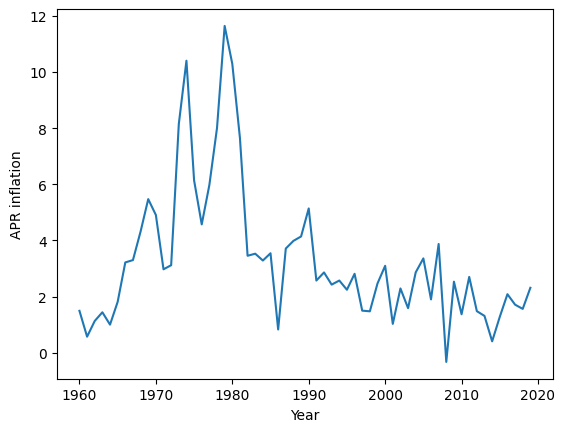

In [5]:
plt.plot(years, inflations)
plt.ylabel("APR inflation")
plt.xlabel("Year")
plt.show()

In [6]:
crimes = pd.read_csv('clean_Crime_rate_1960-2019.csv')


In [7]:
def convertToInt(arr):
  out = []
  for x in arr:
    # x = x[0:4]
    # print(x)
    converted = np.double(x)
    out.append(converted)
  return out

In [8]:
start = True
previous = 0
growth = []
year_growth = []

for x in crimes.values:
  y = x[0]
  p = x[1]
  year = np.int16(y)
  pop = np.double(p)
  if start:
    previous = pop
    start = False
    continue
  else:
    cur_growth = (pop - previous) / previous
    cur_growth *= 100
    growth.append(cur_growth)
    year_growth.append(year)
    previous = pop



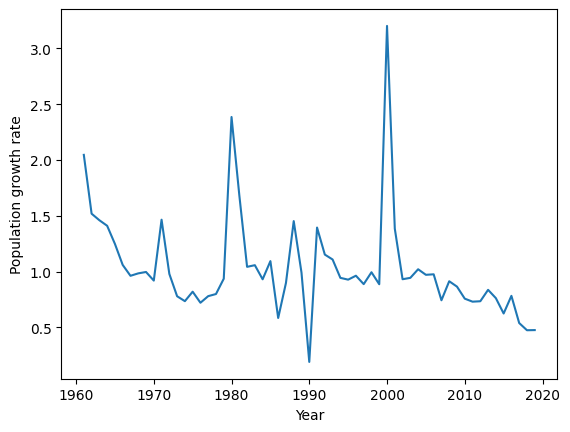

In [9]:
plt.plot(year_growth, growth)
plt.ylabel("Population growth rate")
plt.xlabel("Year")
plt.show()

In [10]:
def computeChange(data, years):
  start = True
  previous = 0
  growth = []
  year_growth = []

  for i in range(len(data)):
    cur = data[i]
    if start:
      previous = cur
      start = False
      continue
    else:
      year = years[i]
      cur_growth = (cur - previous) / previous
      cur_growth *= 100
      growth.append(cur_growth)
      year_growth.append(year)
      previous = pop

  return (growth, year_growth)

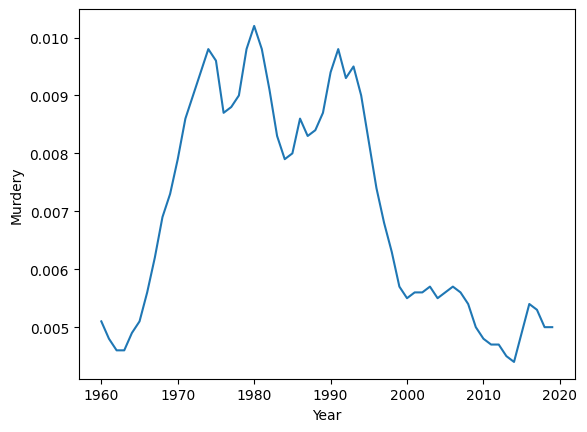

In [11]:
years_crime = crimes['Year\xa0']
murders = crimes['Murder\xa0']

mur = convertToInt(murders)
year_crime = convertToInt(years_crime)
#convert mur to np array
mur = np.array(mur)
year_crime = np.array(year_crime)
mur = (mur/100000)*100
plt.plot(year_crime, mur)
plt.ylabel("Murdery")
plt.xlabel("Year")
plt.show()

Correlation between murder and populaiton

In [12]:
mur_growth, mur_year = computeChange(mur, year_crime)

murr_corr = pd.Series(mur_growth)
pop_corr = pd.Series(growth)
murr_corr.corr(pop_corr)

0.2916850361008071

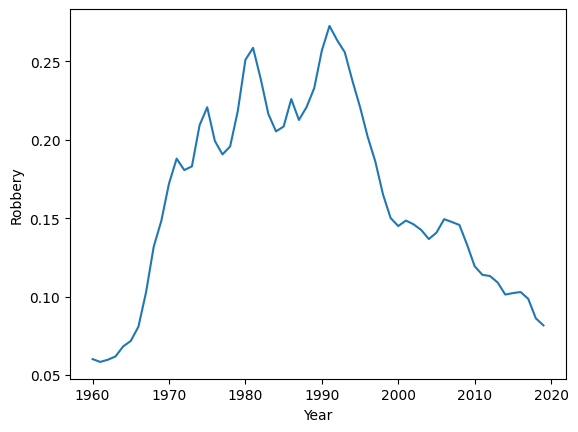

In [13]:
thefts = crimes['Robbery\xa0']
roberry = convertToInt(thefts)
roberry = (np.array(roberry)/100000)*100
plt.plot(year_crime, roberry)
plt.ylabel("Robbery")
plt.xlabel("Year")
plt.show()

In [14]:
roberry_growth, rob_year = computeChange(roberry, year_crime)

rob_corr = pd.Series(roberry_growth)
rob_corr.corr(pop_corr)

0.2916850362220492

In [15]:
murr_corr.corr(rob_corr)

0.9999999999999999

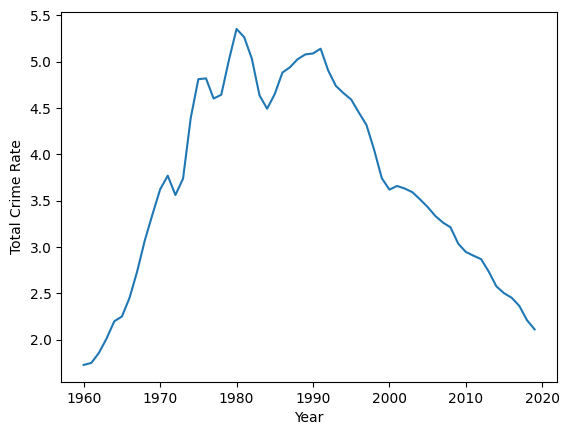

In [16]:
Y = crimes['Year\xa0']
years_ratio = convertToInt(Y)

population = []
total = []
for x in crimes.values:
  pop = x[3]
  tot = x[4]
  pop = pop.replace(",", "")
  tot = tot.replace(",", "")
  pop = np.double(pop)
  tot = np.double(tot)
  total.append(tot)
  population.append(pop)


for i in range(len(total)):
  popul = population[i]
  k = popul / 100000
  total_crimes = total[i] * k
  total[i] = total_crimes / popul
  total[i] *= 100
  # total[i] = total_crimes

# plt.plot(years_ratio, population)
plt.plot(years_ratio, total)
plt.xlabel("Year")
plt.ylabel("Total Crime Rate")
plt.show()

Correlation between population and ration of crime per the population

In [17]:
ratio_growth, Y_ratio_growth = computeChange(total, years_ratio)
ratio_corr = pd.Series(ratio_growth)

ratio_corr.corr(pop_corr)

0.29400123040260595

Correlation between the number of all crimes and population growth

In [18]:
total_correlated = pd.Series(total)
growth_correlated = pd.Series(growth)

total_correlated.corr(growth_correlated)

0.022726596152207183

Correlation between population growth and inflation

In [19]:
inflation_corr = pd.Series(inflations)
growth_corr = pd.Series(growth)

print(inflation_corr.corr(growth_corr))

0.18050563276974296


In [21]:
property = []
for x in crimes.values:
  prop = x[4]
  tot = np.double(tot)
  property.append(prop)
print(property)

['1726.3\xa0', '1747.9\xa0', '1857.5\xa0', '2012.1\xa0', '2197.5\xa0', '2248.8\xa0', '2450.9\xa0', '2736.5\xa0', '3071.8\xa0', '3351.3\xa0', '3621.0\xa0', '3768.8\xa0', '3560.4\xa0', '3737.0\xa0', '4389.3\xa0', '4810.7\xa0', '4819.5\xa0', '4601.7\xa0', '4642.5\xa0', '5016.6\xa0', '5353.3\xa0', '5263.8\xa0', '5032.5\xa0', '4637.3\xa0', '4492.1\xa0', '4650.5\xa0', '4881.8\xa0', '4940.3\xa0', '5027.1\xa0', '5077.9\xa0', '5088.5\xa0', '5139.7\xa0', '4902.7\xa0', '4737.7\xa0', '4660.0\xa0', '4591.3\xa0', '4451.0\xa0', '4316.3\xa0', '4049.1\xa0', '3743.6\xa0', '3618.3\xa0', '3658.1\xa0', '3630.6\xa0', '3591.20', '3514.1\xa0', '3431.5\xa0', '3334.5\xa0', '3263.5\xa0', '3211.5\xa0', '3036.1\xa0', '2945.90', '2905.40', '2868.00', '2733.30', '2574.10', '2500.50', '2451.60', '2362.90', '2209.8\xa0', '2109.9\xa0']


In [ ]:
# bar chart of different types of crimes
print(crimes.columns)
violent = crimes['Violent\xa0']
prop = crimes['Property\xa0']
murr = crimes['Murder\xa0']
rape = crimes['Forcible Rape\xa0']
agg_assault = crimes['Aggravated assault\xa0']
burglary = crimes['Burglary\xa0']
larceny = crimes['Larceny Theft\xa0']
motor = crimes['Vehicle Theft\xa0']
print(prop)
violent = convertToInt(violent)
prop = convertToInt(prop)
murr = convertToInt(murr)
rape = convertToInt(rape)
agg_assault = convertToInt(agg_assault)
burglary = convertToInt(burglary)
larceny = convertToInt(larceny)
motor = convertToInt(motor)

violent = (np.array(violent)/100000)*100
prop = (np.array(prop)/100000)*100
murr = (np.array(murr)/100000)*100
rape = (np.array(rape)/100000)*100
agg_assault = (np.array(agg_assault)/100000)*100
burglary = (np.array(burglary)/100000)*100
larceny = (np.array(larceny)/100000)*100
motor = (np.array(motor)/100000)*100

#bar chart of different types of crimes
plt.bar(year_crime, violent)
plt.bar(year_crime, prop)



In [23]:
import scipy.stats as reg
res = reg.linregress(inflations[1:], growth)
res.slope

0.01255823726591809

Regression for the entire dataset

5.299865677365485


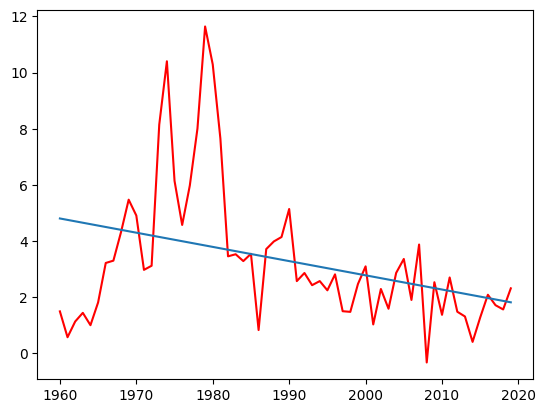

In [34]:
degree = 1
regression1 = np.polyfit(years, inflations, degree)
model1 = np.poly1d(regression1)

mse1_sum = 0
for infl, x in zip(inflations, years):
    prediction = model1(x)
    mse1_sum += (infl - prediction)**2
mse1 = mse1_sum / len(inflations)
print(mse1)

plt.plot(years, inflations, c='red')
plt.plot(years, model1(years))
plt.show()

Regression based on the last twenty years

0.8909909447016451


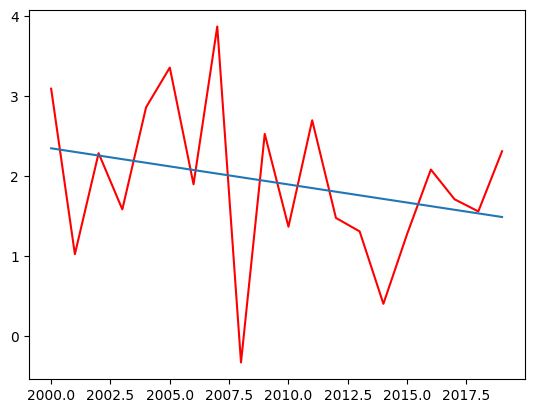

In [35]:
regression2 = np.polyfit(years[-20:], inflations[-20:], degree)
model2 = np.poly1d(regression2)

mse2_sum = 0
for infl, x in zip(inflations[-20:], years[-20:]):
    prediction = model2(x)
    mse2_sum += (infl - prediction)**2
mse2 = mse2_sum / 20
print(mse2)

plt.plot(years[-20:], inflations[-20:], c='red')
plt.plot(years[-20:], model2(years[-20:]))
plt.show()

Extracting extra data for the inflation set

In [26]:
current = ''
extra_years = []
extra_inflation = []
extra_buffer = []
not_found = True
prev = 0.0

for x in monthly_inflation_rates.values:
  date = x[0]
  date = date[:4]
  if not_found:
    if date[:4] == '2020':
      current = '2020'
      prev = x[1]
      not_found = False
      extra_years.append(current)
  else:
    if date == current:
      c = x[1]
      infl = (c - prev) / prev
      extra_buffer.append(infl)
      prev = c
    else:
      current = date
      arr = np.array(extra_buffer)
      sum = arr.sum()
      sum *= 100
      extra_buffer = []
      extra_inflation.append(sum)
      extra_years.append(current)

arr = np.array(extra_buffer)
sum = arr.sum()
sum*=200
extra_inflation.append(sum)

In [27]:
extra_years = convertToInt(extra_years)

12.975475525210348


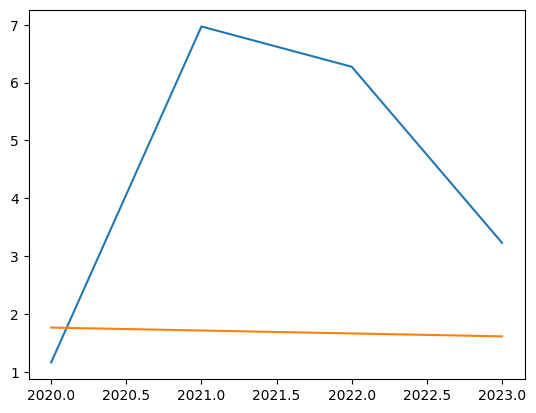

In [37]:
mse_extra1 = 0
for infl, x in zip(extra_inflation, extra_years):
    prediction = model1(x)
    mse_extra1 += (infl - prediction)**2
mseExtra1 = mse_extra1 / len(extra_inflation)
print(mseExtra1)


plt.plot(extra_years, extra_inflation)
plt.plot(extra_years, model1(extra_years))
plt.show()

14.754617948731234


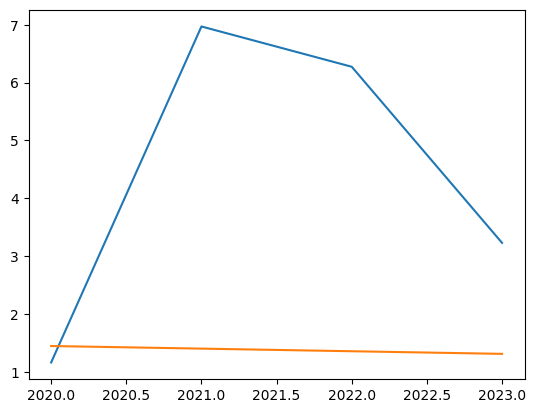

In [38]:
mse_extra2 = 0
for infl, x in zip(extra_inflation, extra_years):
    prediction = model2(x)
    mse_extra2 += (infl - prediction)**2
mseExtra2 = mse_extra2 / len(extra_inflation)
print(mseExtra2)

plt.plot(extra_years, extra_inflation)
plt.plot(extra_years, model2(extra_years))
plt.show()

Correlation between population growth and inflation with graph

Correlation between population growth and inflation is 0.21934441362425117


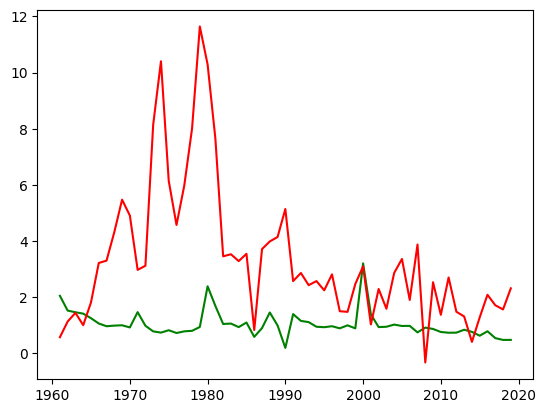

In [67]:
print("Correlation between population growth and inflation is " + str(growth_corr.corr(inflation_corr[1:])))

plt.plot(years[1:], growth, c='green')
plt.plot(years[1:], inflations[1:], c='red')
plt.show()

Estimating inflation based on population growth

Mean squared error is 6.254328106121984


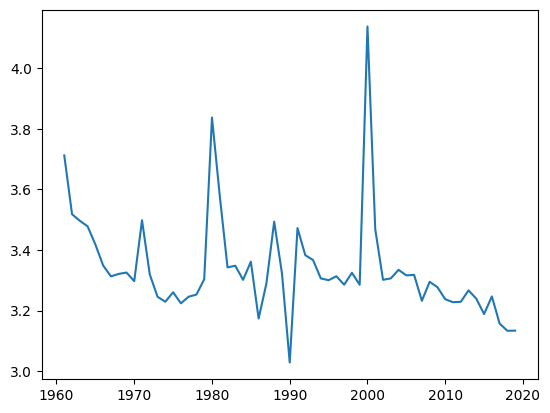

In [69]:
b, a = np.polyfit(growth, inflations[1:], 1)

estimated_infl = []
for x in growth:
  res = a + b*x
  estimated_infl.append(res)

# estimation error
mse_estim_sum = 0
for i in range(len(estimated_infl)):
   mse_estim_sum += (inflations[i+1] - estimated_infl[0])**2
mse_estim = mse_estim_sum / len(estimated_infl)
print("Mean squared error is "+ str(mse_estim))

plt.plot(years[1:], estimated_infl)
plt.show()

Predicting population growth for the next 20 years and predict inflation rate based on predicted populaiton growth

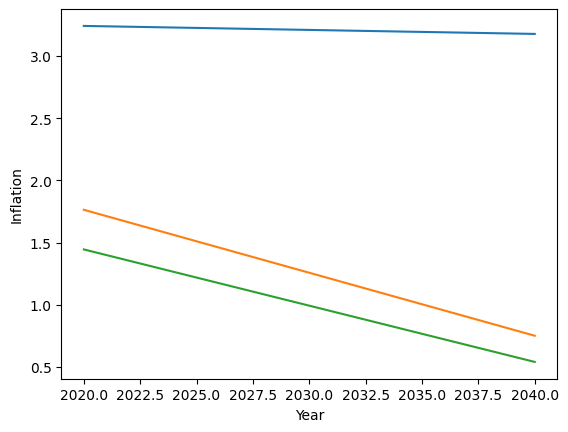

In [73]:
reg_growth = np.polyfit(years[1:], growth, 1)
model_growth = np.poly1d(reg_growth)

years_growth = []
predicted_inflation = []
for i in range(21):
  y = 2020 + i
  years_growth.append(y)
  predicted = model_growth(y)
  infl = a + b * predicted
  predicted_inflation.append(infl)

plt.plot(years_growth, predicted_inflation)
plt.plot(years_growth, model1(years_growth))
plt.plot(years_growth, model2(years_growth))
plt.ylabel("Inflation")
plt.xlabel("Year")
plt.show()

Comparing the predicted inflation with a true values based on population growth

MSE for the predicted inflation based on the predicted growth rate is 6.874279431121558


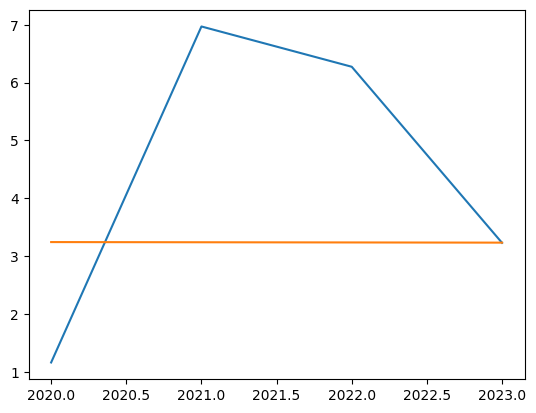

In [77]:
mse_sum = 0
for i in range(len(extra_inflation)):
  mse_sum += (extra_inflation[i] - predicted_inflation[i])**2
mse_sum /= len(extra_inflation)
print("MSE for the predicted inflation based on the predicted growth rate is " + str(mse_sum))


plt.plot(extra_years, extra_inflation)
plt.plot(extra_years, predicted_inflation[:4])
plt.show()
